# Vamos aplicar o que aprendemos sobre processamento dos dados
*   Complete com o código em falta
*   Sempre que necessário, **substitua** ___

---


[documentação](https://scikit-learn.org/stable/index.html) <br>
dataset: [fonte](https://www.kaggle.com/datasets/mirichoi0218/insurance)

---

>[Vamos aplicar o que aprendemos sobre processamento dos dados](#scrollTo=7UqvAzOuK_SN)

>[1. Corra a primeira célula de código para obter o dataframe com que vamos trabalhar](#scrollTo=25DtwghMIQqJ)

>[2. Trate os dados em falta](#scrollTo=glt7JqnNdHxk)

>[3. Trate as variáveis categóricas](#scrollTo=Rq7QOxUC9Y4u)

>[4. Escale as variáveis](#scrollTo=_ZSGbtOHGQ8_)



#1.&nbsp;Corra a primeira célula de código para obter o dataframe com que vamos trabalhar

In [2]:
# faça o upload do ficheiro csv associado à atividade

# vamos importar a biblioteca
import pandas as pd
import numpy as np

# vamos importar o dataframe do ficheiro .csv
df_insurance = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/insurance.csv")

In [7]:
df_insurance.head(5)

,age,sex,bmi,children,region,charges
0,19.0,female,27.900,0,NaN,16884.92400
1,18.0,male,33.770,1,NaN,1725.55230
2,28.0,male,33.000,3,NaN,4449.46200
3,33.0,male,22.705,0,NaN,21984.47061
4,32.0,male,28.880,0,NaN,3866.85520


In [3]:
# veja as 5 primeiras linhas do dataframe
df_insurance.head()
# veja a forma do dataframe: quantas linhas, quantas colunas?
df_insurance.shape
# veja a informação sobre o dataframe
df_insurance.info()
# veja a descrição das variáveis numéricas
df_insurance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1276 non-null   float64
 1   sex       1336 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   region    383 non-null    object 
 5   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 62.8+ KB


,age,bmi,children,charges
count,1276.000000,1338.000000,1338.000000,1338.000000
mean,39.202978,30.663397,1.094918,13270.422265
std,14.051179,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#2.&nbsp;Trate os dados em falta

In [6]:
# remova a coluna quase sem informação
df_insurance_cleaned = df_insurance.drop('region', axis=1)

In [8]:
df_insurance_cleaned.head(5)

,age,sex,bmi,children,charges
0,19.0,female,27.900,0,16884.92400
1,18.0,male,33.770,1,1725.55230
2,28.0,male,33.000,3,4449.46200
3,33.0,male,22.705,0,21984.47061
4,32.0,male,28.880,0,3866.85520


<Axes: >

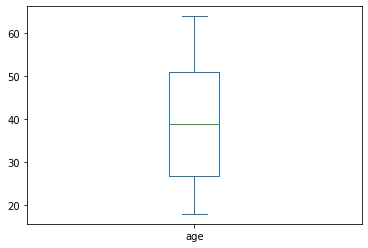

In [9]:
# avalie a distribuição dos dados da coluna numérica
df_insurance_cleaned.age.plot(kind='box')

In [10]:
# importe o modelo de impute
from sklearn.impute import SimpleImputer

# preencha os dados em falta
si_age = SimpleImputer(strategy = 'median')
df_insurance_cleaned['age'] = si_age.fit_transform(df_insurance_cleaned[['age']])

In [13]:
df_insurance_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1336 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 52.4+ KB


In [14]:
# remova os restantes casos
df_insurance_cleaned.dropna(inplace = True)

#3.&nbsp;Trate as variáveis categóricas

In [15]:
# importe o package
from sklearn.preprocessing import OneHotEncoder

# defina a lista de colunas a passar ao modelo
ohe_list = ['sex', 'children']

# faça One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit_transform(df_insurance_cleaned[ohe_list]) # entrega em array
ohe.get_feature_names_out()

df_ohe = pd.DataFrame(
    data=ohe.transform(df_insurance_cleaned[ohe_list]),
    columns=ohe.get_feature_names_out()
)

df_insurance_cleaned = pd.concat([df_insurance_cleaned.reset_index(drop = True), df_ohe.reset_index(drop = True)], axis = 1)
df_insurance_cleaned.drop(ohe_list, inplace=True, axis=1)

In [16]:
df_insurance_cleaned

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5
0,19.0,27.900,16884.92400,0.0,0.0,0.0,0.0,0.0,0.0
1,18.0,33.770,1725.55230,1.0,1.0,0.0,0.0,0.0,0.0
2,28.0,33.000,4449.46200,1.0,0.0,0.0,1.0,0.0,0.0
3,33.0,22.705,21984.47061,1.0,0.0,0.0,0.0,0.0,0.0
4,32.0,28.880,3866.85520,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1331,50.0,30.970,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0
1332,18.0,31.920,2205.98080,0.0,0.0,0.0,0.0,0.0,0.0
1333,18.0,36.850,1629.83350,0.0,0.0,0.0,0.0,0.0,0.0
1334,21.0,25.800,2007.94500,0.0,0.0,0.0,0.0,0.0,0.0


# 4.&nbsp;Escale as variáveis

In [17]:
# importe o package
from sklearn.preprocessing import StandardScaler, PowerTransformer

# utilize o StandardScaler no imc
std_scaler = StandardScaler()
df_insurance_cleaned['bmi'] = std_scaler.fit_transform(df_insurance_cleaned[['bmi']])

# utilize a transformação de yeo-johnson na idade
pow_scaler = PowerTransformer()
df_insurance_cleaned['age'] = pow_scaler.fit_transform(df_insurance_cleaned[['age']])

In [18]:
df_insurance_cleaned

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5
0,-1.555696,-0.453140,16884.92400,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.647760,0.509333,1725.55230,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.787747,0.383080,4449.46200,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.397300,-1.304936,21984.47061,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.473716,-0.292454,3866.85520,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1331,0.803348,0.050232,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0
1332,-1.647760,0.205998,2205.98080,0.0,0.0,0.0,0.0,0.0,0.0
1333,-1.647760,1.014344,1629.83350,0.0,0.0,0.0,0.0,0.0,0.0
1334,-1.376184,-0.797465,2007.94500,0.0,0.0,0.0,0.0,0.0,0.0
